# Tarefa
Aplicar um algorítmo capaz de classificar flores de íris em suas três espécies.


# Importar Dataset

In [1]:
# importar arquivos do dropbox
import urllib.request

url = 'https://www.dropbox.com/s/7u4a1qz4r628tb4/Iris.csv?dl=1'

u = urllib.request.urlopen(url)
data = u.read()
u.close()

with open('Iris.csv', "wb") as f:
  f.write(data)

url = 'https://www.dropbox.com/s/munyydxeaqxza6i/9cede6e3-0932-430a-a17e-d30025eb2b02.png?dl=1'
u = urllib.request.urlopen(url)
data = u.read()
u.close()

with open('petalandsepal.png', "wb") as f :
   f.write(data)

In [2]:
import pandas as pd

# atribuir variável ao dataset
df_raw = pd.read_csv('Iris.csv')
df_raw.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Para melhor compreensão das colunas do dataset, observar a imagem:

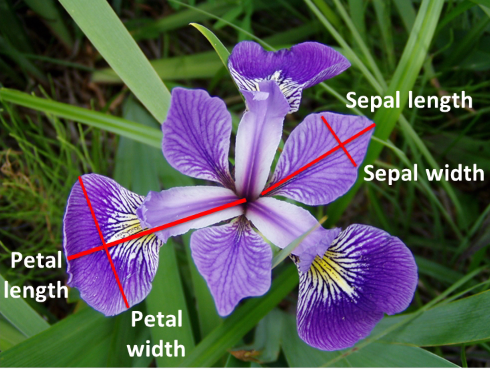

In [3]:
# imagem para compreensão das features

from IPython.display import Image
Image(filename='petalandsepal.png')

# Tratamento e Análise exploratória dos dados

In [4]:
# listar as colunas
df_raw.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
# traduzir as colunas
a_renomear = {
              'SepalLengthCm': 'sepala_comprimento',
              'SepalWidthCm': 'sepala_largura',
              'PetalLengthCm': 'petala_comprimento',
              'PetalWidthCm': 'petala_largura',
              'Species': 'especies'
}

df = df_raw.rename(columns= a_renomear).drop(columns='Id')

df.head()

,sepala_comprimento,sepala_largura,petala_comprimento,petala_largura,especies
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# observar quantidade de linhas e colunas 
linhas, colunas = df.shape
print("O conjunto de dados possui {} linhas e {} colunas.".format(
    linhas, colunas))

O conjunto de dados possui 150 linhas e 5 colunas.


In [7]:
# verificar o formato dos dados
df.dtypes

sepala_comprimento    float64
sepala_largura        float64
petala_comprimento    float64
petala_largura        float64
especies               object
dtype: object

In [8]:
# verificar a existência de dados nulos
df.isnull().sum()

sepala_comprimento    0
sepala_largura        0
petala_comprimento    0
petala_largura        0
especies              0
dtype: int64

In [9]:
# análise descritiva do dataframe
df.describe()

,sepala_comprimento,sepala_largura,petala_comprimento,petala_largura
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
# listar espécies de íris e sua quantidade no dataframe 
df.especies.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: especies, dtype: int64

In [11]:
df.especies.value_counts(ascending=True)

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: especies, dtype: int64

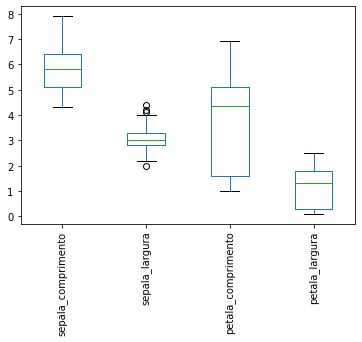

In [12]:
# boxplot das features do dataset
import matplotlib.pyplot as plt

df.plot(kind='box', 
        sharex=False, 
        sharey=False)

plt.xticks(rotation=90);

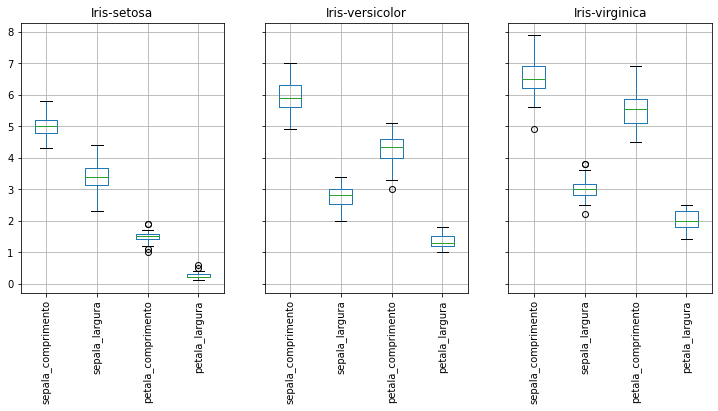

In [13]:
# boxplot das features em função das espécies
df.groupby('especies').boxplot(rot= 90, 
                               layout = (1, 3), 
                               figsize=(12,5));

In [14]:
# descrever os dados em função da espécie
df.groupby(by="especies").agg(["mean" , 
                               "min" , 
                               "max"])

sepala_comprimento            ... petala_largura          
                              mean  min  max  ...           mean  min  max
especies                                      ...                         
Iris-setosa                  5.006  4.3  5.8  ...          0.244  0.1  0.6
Iris-versicolor              5.936  4.9  7.0  ...          1.326  1.0  1.8
Iris-virginica               6.588  4.9  7.9  ...          2.026  1.4  2.5

[3 rows x 12 columns]

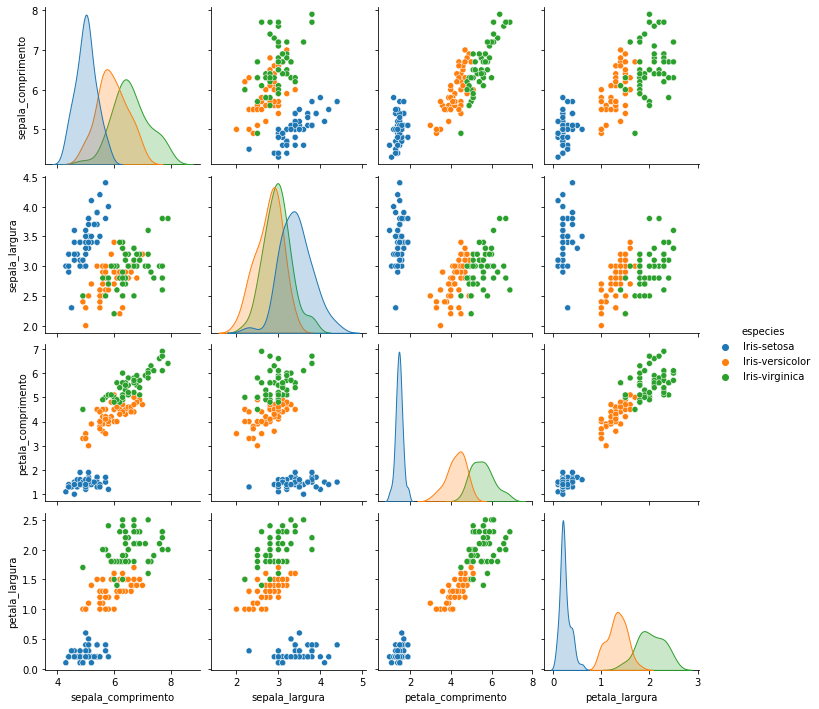

In [15]:
# verificar a relação entre as features em função das espécies
import seaborn as sns
sns.pairplot(df, hue = 'especies');

# Preprocessamento dos dados

In [16]:
# alterar o nomes das espécies para uma variável categórica numérica
especies = {
            'Iris-versicolor': '0',
            'Iris-setosa': '1',
            'Iris-virginica': '2'
}

df['especies'] = df['especies'].map(especies)

df.head()

,sepala_comprimento,sepala_largura,petala_comprimento,petala_largura,especies
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [17]:
# definir as variáveis independentes e a variável dependente
X = df[["sepala_comprimento", 
        "sepala_largura", 
        "petala_comprimento",
        "petala_largura"]]

y = df["especies"]

In [18]:
# dividir os dados de treino e teste
from sklearn.model_selection import train_test_split

SEED = 20

treino_X, teste_X, treino_y, teste_y = train_test_split(X, 
                                                        y,
                                                        random_state = SEED, 
                                                        test_size = 0.25, 
                                                        stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (
    len(treino_X), len(teste_X)))


Treinaremos com 112 elementos e testaremos com 38 elementos


# Aplicando classificador baseline

In [19]:
# implementar um algoritmo de baseline
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

modelo_dummy = DummyClassifier(strategy='stratified')
modelo_dummy.fit(treino_X, treino_y)
acuracia_dummy = modelo_dummy.score(teste_X, teste_y)

print("A acurácia do DummyClassifier foi %.2f%%" % (acuracia_dummy * 100))

A acurácia do DummyClassifier foi 26.32%


# Aplicando o classificador de regressão logística

In [20]:
# implementar o modelo de logistic regression

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# modelo_lr = LogisticRegression(solver='lbfgs', max_iter = 1000)
modelo_lr = LogisticRegression()

modelo_lr.fit(treino_X, treino_y)
acuracia_lr = modelo_lr.score(teste_X, teste_y)

print("A acurácia do LogisticRegression foi %.2f%%" % (acuracia_lr * 100))

A acurácia do LogisticRegression foi 97.37%


Métricas do modelo: matriz de confusão

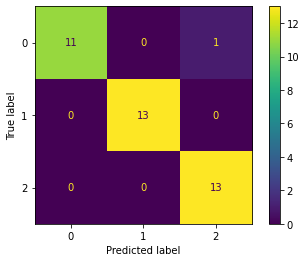

In [21]:
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, \
plot_confusion_matrix, plot_roc_curve, recall_score, classification_report

plot_confusion_matrix, plot_roc_curve
modelo_lr.fit(treino_X, treino_y)
plot_confusion_matrix(modelo_lr, 
                      teste_X, 
                      teste_y, 
                      values_format='d');      

Observando o erro do modelo

In [22]:
# quais elementos o modelo não acertou a espécies
y_previsoes_lr = modelo_lr.predict(teste_X)
y_previsoes_lr

array(['1', '2', '0', '0', '1', '1', '1', '2', '2', '2', '1', '1', '0',
       '2', '1', '1', '0', '1', '2', '1', '2', '2', '0', '2', '0', '0',
       '0', '0', '2', '1', '2', '1', '2', '0', '2', '0', '2', '1'],
      dtype=object)

In [23]:
comparacao_y = pd.DataFrame()
comparacao_y['real'] = teste_y
comparacao_y['previsto'] = y_previsoes_lr
comparacao_y

,real,previsto
6,1,1
125,2,2
78,0,0
59,0,0
18,1,1
42,1,1
8,1,1
144,2,2
137,2,2
123,2,2


In [24]:
comparacao_y[comparacao_y['real'] != comparacao_y['previsto']]

,real,previsto
70,0,2


Elemento que o modelo previu erroneamente

In [25]:
df.iloc[70:71,:]

,sepala_comprimento,sepala_largura,petala_comprimento,petala_largura,especies
70,5.9,3.2,4.8,1.8,0
